In [19]:
#Librerías
import numpy as np
import gym
from gym.envs.toy_text.frozen_lake import generate_random_map
import random
from IPython.display import clear_output
import time
import gymLake as gymlocal
import matplotlib.pyplot as plt

In [33]:
# --Creación de Ambiente--
#env = gym.make("FrozenLake-v0")
random_map = generate_random_map(size=4, p=0.8)
env = gymlocal.FrozenLakeEnv(desc=random_map)
env.render()


SFHF
FHHF
FFFF
FFFG


In [34]:
# --Q-Table--
action_size = env.action_space.n
state_size = env.observation_space.n
qtable = np.zeros((state_size, action_size))
print(qtable)
print("action_size: ", action_size)
print("state_size: ", state_size)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
action_size:  4
state_size:  16


In [39]:
# --Hiperparámetros--
#Episodios totales
total_episodes = 1000		
#Máximo de pasos en el episodio	
max_steps = 99	
#Factor de aprendizaje	
learning_rate = 0.8 
#Factor de penalización
gamma = 0.5 		

#Parámetros de exploración
epsilon = 0.1			
max_epsilon = 1.0 			
min_epsilon = 0.01	
#Cuánto irá disminuyendo el epsilon	
decay_rate = 0.001	


y=[]
yy=[]

In [40]:
# --Q-LEARNING--
rewards = [] # Lista de recompensad

for episode in range(total_episodes):
    # Resetear ambiente
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0 # Recompensa total de episodio

    for step in range(max_steps):
        exp_exp_tradeoff = random.uniform(0,1)
        if exp_exp_tradeoff > epsilon:
            # Explotación
            action = np.argmax(qtable[state, :])
        else:
            # Exploración
            action = env.action_space.sample()

        
        # Devolver estado y recompensa
        new_state, reward, done, info = env.step(action)

        # Actualizar Q-table
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) - qtable[state, action])

        total_rewards += reward

        #Mover nuevo estado
        state = new_state
        '''clear_output(wait=True)
        env.render()
        
        time.sleep(0.01)'''
        
        
        
        # Si termina el episodio
        if done:
            break
    
    if episode % 100 == 0:
            clear_output(wait=True)
            print(f"Episode: {episode}")
    episode += 1
    if(reward < 0):
        y.append(0)
    else:
        y.append(1)
    
    yy.append(step)

    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*episode)
    rewards.append(total_rewards)

print("Score over time: " + str(sum(rewards)/total_episodes))
print(qtable)
    


Episode: 900
Score over time: -5.607
[[-4.06250000e-01  1.18750000e+00 -1.20312500e+00 -4.06250000e-01]
 [-4.06250000e-01 -1.00000000e+02 -1.00000000e+02 -1.20312500e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.00000000e+01 -4.88000000e-02  0.00000000e+00 -2.00000000e-01]
 [ 1.18750000e+00  4.37500000e+00 -1.00000000e+02 -4.06250000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-8.72000000e+01  4.89464266e+01  2.19165798e+01 -3.60000000e-01]
 [ 4.37500000e+00  1.07500000e+01  1.07500000e+01  1.18750000e+00]
 [ 4.37500000e+00  2.35000000e+01  2.35000000e+01 -1.00000000e+02]
 [ 1.07500000e+01  4.90000000e+01  4.90000000e+01 -1.00000000e+02]
 [ 2.34999988e+01  1.00000000e+02  4.89978745e+01  2.32187987e+01]
 [ 1.07500000e+01  1.07500000e+01  2.35000000e+01  4.37500000e+00]
 [ 1.07500000e+01  2.35000000e+01  4.90000000e+01  1.07500000e+01]
 [ 2.35000000e+01  4.9000

In [41]:
    rewards_per_thousand_episodes = np.split(np.array(rewards),total_episodes/100)
    count = 100

    print("******** Promedio cada 1000 episodios ********")
    for r in rewards_per_thousand_episodes:
        print(count, ": ", str(sum(r/100)))
        count += 100
  

******** Promedio cada 1000 episodios ********
100 :  -83.54000000000003
200 :  -81.98000000000003
300 :  -40.460000000000015
400 :  -22.40000000000001
500 :  -1.0400000000000003
600 :  -1.6400000000000081
700 :  23.129999999999995
800 :  48.620000000000005
900 :  42.56
1000 :  60.680000000000014


Episode 5
  (Right)
SFHF
FHHF
FFFF
FFFG
Recompensa del paso: 100
Recompensa final: 95
Juego terminado
Porcentaje de éxito: 100.0 %
**********************************************************
EPISODE  0
[[-4.06250000e-01  1.18750000e+00 -1.20312500e+00 -4.06250000e-01]
 [-4.06250000e-01 -1.00000000e+02 -1.00000000e+02 -1.20312500e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.00000000e+01 -4.88000000e-02  0.00000000e+00 -2.00000000e-01]
 [ 1.18750000e+00  4.37500000e+00 -1.00000000e+02 -4.06250000e-01]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-8.72000000e+01  4.89464266e+01  2.19165798e+01 -3.60000000e-01]
 [ 4.37500000e+00  1.07500000e+01  1.07500000e+01  1.18750000e+00]
 [ 4.37500000e+00  2.35000000e+01  2.35000000e+01 -1.00000000e+02]
 [ 1.07500000e+01  4.90000000e+01  4.90000000e+01 -1.00000000e+02]
 [ 2.34999988e+01  1.00000000e+02  4.89978745e+01  2.32187987e

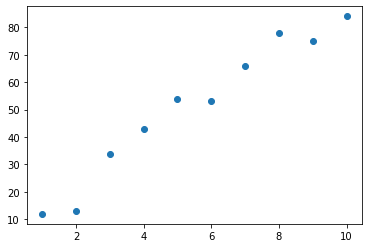

Movimientos por repeticion


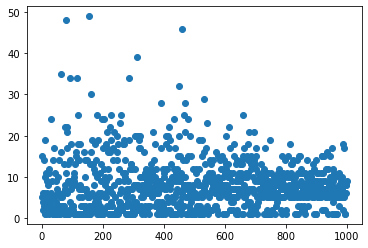

Training finished.



In [42]:
# Test
casos_favorable = 0
for juego in range(5):
    recompensas_total = 0
    state = env.reset()

    while True:
        clear_output(wait = True)
        print(f'Episode {juego+1}')

        env.render()
        action = np.argmax(qtable[state])
        state, reward, done, info = env.step(action)
        recompensas_total += reward
        print(f'Recompensa del paso: {reward}')
        print(f'Recompensa final: {recompensas_total}')
        
        time.sleep(0.3)
        
        if done:
            print('Juego terminado')
            if recompensas_total > 0 :
                casos_favorable += 1
            time.sleep(2)
            break

print("Porcentaje de éxito:", (casos_favorable/5)*100, "%")

env.reset()

for episode in range(5):
    state = env.reset()
    step = 0
    done = False
    print("**********************************************************")
    print("EPISODE ", episode)
    print(qtable)
    for step in range(max_steps):
        env.render()

        action = np.argmax(qtable[state, :])

        new_state, reward, done, info = env.step(action)
        print('reward: ', reward)
        '''clear_output(wait=True)
        env.render()
        
        time.sleep(0.1)'''
        if done:
            break

        state = new_state
    


#Grafica-----------------------------------------------------------------------------------------------------------

cont = 1
lenthx = 0
porcentage = 0
porcentagey = []
for i in y:
    porcentage += i
    if(cont%100 == 0):
        porcentagey.append(porcentage)
        porcentage = 0
        cont=0
        lenthx +=1

    cont+=1

print("Fallos por repeticion")
x = list(range(1, total_episodes+1))
porcentagex = list(range(1, lenthx+1))
#print('x: ', len(porcentagex), ' y: ', len(porcentagey))
fig, ax = plt.subplots()
#ax.scatter(x, y)
ax.scatter(porcentagex, porcentagey)
plt.show()
print("Movimientos por repeticion")


fig, ax = plt.subplots()
ax.scatter(x, yy)
plt.show()
print("Training finished.\n")

#------------------------------------------------------------------------------------------------------------

env.close()